# Simple model of de-mixing transitions

Phase transitions of the type we are considering here are generally driven by the competition between **Energy** and **Entropy**. 
Entropy favors a disordered state where all components are thoroughly mixed. 
The minimal energy state is the state were as many favorable interactions between molecules are realized as possible, which favors segregation.
But why does this competition result in sharp phase transitions?

To get some understanding of such transitions, it is instructive to consider a very simple model with two molecular species $p$ and $s$ arranged on a lattice:

![image.png](figures/lattice_model.png)

Illustration of multi-component mixtures. From Brangwynne et al. 2015.

We will calculate the free energy of the such a model and ask whether mixture is stable towards phase separation. 

The energy (enthalpy) of the system is simply the sum of all neighbor-neighbor interactions $u_{pp}$, $u_{sp}$ and $u_{ss}$.

$$
U = n_{ss} u_{ss} + n_{sp} u_{sp} + n_{pp} u_{pp}
$$

where $n_{ss}$, $n_{sp}$, and $n_{pp}$ are the number of times the respective neighbor relations are observed.

To proceed, we will assume a homogenous mixture where a fraction $\phi$ of lattice sites are occupied by $p$ and $1-\phi$ by $s$ in a random fashion.
For each lattice site, there are $z/2$ connections (each connection contributes to two sites) and the we therefore have

 * $n_{pp} = \frac{Nz}{2}\phi^2$
 * $n_{sp} = Nz\phi(1-\phi)$ (2 ways in which $s-p$ can happen)
 * $n_{ss} = \frac{Nz}{2}(1-\phi)^2$
 
and hence

$$
\begin{split}
U &= \frac{N z}{2} \left[(1-\phi)^2 u_{ss} + \phi^2 u_{pp} + 2\phi(1-\phi)u_{sp}\right] \\
&= \frac{N z}{2}\left[\phi(1-\phi)(2u_{sp} - u_{pp}-u_{ss}) + \phi(u_{pp}-u_{ss}) + u_{ss}\right]
\end{split}
$$

In the second line, we have rearranged the terms slighly to emphasize the role of contributions:

 * $(2u_{sp} - u_{pp}-u_{ss})$ parameterizes the difference between hetero- and homotypic interactions. This term is proportional to the number of heterotypic interactions $\phi(1-\phi)$. 
 * $(u_{pp}-u_{ss})$ parameterizes how much more favorable $pp$ interactions are then $ss$ interactions. This term is only proportional to fraction of $p$.

* the remainder is constant offset. 

Text(0, 0.5, 'energy')

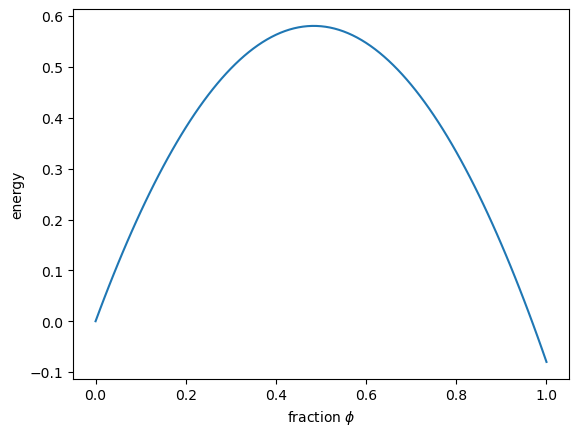

In [5]:
import numpy as np
import matplotlib.pyplot as plt

upp=-.02
uss=0
usp=0.3
z=8

phi = np.linspace(0,1,101)
u = z*((1-phi)*phi*(2*usp-uss-upp) + phi*(upp-uss) + uss)/2
#h = z*(phi**2*upp + 2*phi*(1-phi)*usp + (1-phi)**2*uss)/2
plt.plot(phi, u)
plt.xlabel(r'fraction $\phi$')
plt.ylabel('energy')

The next ingredient that we need is the entropy, i.e. the logarithm of the number of states available to the system.
The number of ways to place $N\phi$ molecules on a lattice of size $N$ is

$$
e^{(S+c)/k} = \frac{N!}{(N\phi)!(N(1-\phi))!}
$$

(Entropy is only defined up to an additive constant and has units of inverse temperature.)

We will simplify this expression using Stirling's approximation for factorials $\log n! \approx n\log n - n$ and find

$$
\begin{split}
S + c &= kN\left[\log N - \phi\log(\phi N) - (1-\phi)\log((1-\phi)N)\right] \\
& = -kN(\phi\log(\phi) + (1-\phi)\log(1-\phi))
\end{split}
$$

The free energy $F=U-TS$ is then given by

$$
\frac{F}{N} =  \frac{z}{2}\left[\phi(1-\phi) (2u_{sp} - u_{pp}-u_{ss}) + \phi(u_{pp}-u_{ss})\right] + kT\left[\phi\log(\phi) + (1-\phi)\log(1-\phi)\right]
$$

Text(0, 0.5, 'free energy')

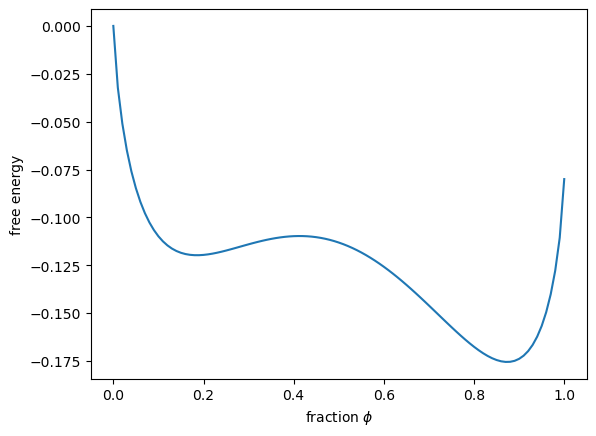

In [8]:
kT = 1

usp=0.1
s = -phi*np.log(phi+1e-16) - (1-phi)*np.log(1-phi+1e-16)
f = u - kT*s

plt.plot(phi,f)
plt.xlabel(r'fraction $\phi$')
plt.ylabel('free energy')

The free energy has multiple minima and is curved up-wards in some regions!
What does this imply?

The mixture at $\phi$ can lower its free energy by segregating into two phases with density $\phi_1$ and $\phi_2$.

![image.png](figures/free_energy_demixing.png)

In this example, the sum of the free energies of a fraction $\alpha$ at $\phi_1$ and $1-\alpha$ at $\phi_2$ is clearly lower than the original $\phi_0$. 
The new densities have to obey the equation $\phi_0 = \alpha \phi_1 + (1-\alpha)\phi_2$ since the total amount of protein and solvent has to stay constant. 


A quick consideration shows that such a separation in high and low density phases is always possible when the curvature of the free energy is negative:

![image.png](figures/free_energy.png)

The average $F$ on a line connecting $(\phi_1, F_1)$ and $(\phi_2, F_2)$ is always below the curve in regions where the curvature of $F$ is negative. Hence any separation into two phases is favorable. The opposite is true for positive curvature.   

Text(0, 0.5, 'free energy')

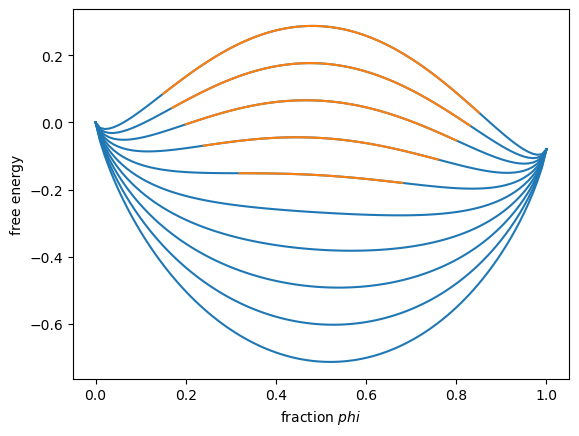

In [9]:
for usp in np.linspace(0,0.5,10):
    h = z*((1-phi)*phi*(2*usp-uss-upp) + phi*(upp-uss) + uss)/2
    s = - phi*np.log(phi+1e-16) - (1-phi)*np.log(1-phi+1e-16)
    f = h - kT*s
    curv = np.zeros_like(f)
    curv[1:-1] = f[2:] + f[:-2] - 2*f[1:-1]
    
    plt.plot(phi, f, c='C0')
    plt.plot(phi[curv<0], f[curv<0], c='C1')
    
plt.xlabel(f'fraction $phi$')
plt.ylabel('free energy')


With increasing repulsion between $s$ and $p$, the region of instability becomes larger and larger. 

It is common that changes of a parameter could move a configuration from a stable to an unstable one:
 * in physical systems: Temperature or pressure
 * in biology: concentrations, modifications, etc

### Dig deeper
 * Why do the terms of the free energy that are linear in $\phi$ don't matter for stability?
 * What are the properties of the free energy at $\phi=0$ or $\phi=1$. Is separation into pure phases every possible? If not, why not?